In [ ]:
import pandas as pd
df=pd.read_csv("/content/fake_or_real_news.csv")

In [ ]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
x=df.iloc[:,2]                #splitting the data into input and output
y=df.iloc[:,3]

In [ ]:
from sklearn.model_selection import train_test_split                    #training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(4751,)

In [ ]:
x_test.shape

(1584,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)                       #using CounterVectorizer
x_test_vect=vect.transform(x_test)

In [ ]:
# method_1
# creating svc model and count vectorizer separately
from sklearn.svm import SVC
model1=SVC()
model1.fit(x_train_vect,y_train)        
y_pred1=model1.predict(x_test_vect)

In [ ]:
y_pred1

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
y_test

3789    REAL
733     FAKE
4783    FAKE
3067    FAKE
5288    REAL
        ... 
64      REAL
2306    REAL
3568    REAL
5717    FAKE
3353    FAKE
Name: label, Length: 1584, dtype: object

In [ ]:
# checking accuracy in svc model
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.8642676767676768

In [ ]:
#method_2
# using svm pipeline for svc
from sklearn.pipeline import make_pipeline
model2=make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [ ]:
y_pred2

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
y_test

3789    REAL
733     FAKE
4783    FAKE
3067    FAKE
5288    REAL
        ... 
64      REAL
2306    REAL
3568    REAL
5717    FAKE
3353    FAKE
Name: label, Length: 1584, dtype: object

In [ ]:
# checking accuracy for pipeline method for svc
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.8383838383838383

In [ ]:
#method_3
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()
model3.fit(x_train_vect,y_train)
y_pred3=model3.predict(x_test_vect)


In [ ]:
y_pred3

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype='<U4')

In [ ]:
y_test

3789    REAL
733     FAKE
4783    FAKE
3067    FAKE
5288    REAL
        ... 
64      REAL
2306    REAL
3568    REAL
5717    FAKE
3353    FAKE
Name: label, Length: 1584, dtype: object

In [ ]:
# checking accuracy for naive bayes model
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.8819444444444444

In [ ]:
#method_4
#create a pipeline with Vectorization model and ML algorithm to predict the news as real or fake for the multinomialNB and CountVectorizer
from sklearn.pipeline import make_pipeline
model4=make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)

In [ ]:
y_pred4

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype='<U4')

In [ ]:
y_test

3789    REAL
733     FAKE
4783    FAKE
3067    FAKE
5288    REAL
        ... 
64      REAL
2306    REAL
3568    REAL
5717    FAKE
3353    FAKE
Name: label, Length: 1584, dtype: object

In [ ]:
# checking the accuracy for MultinomialNB and countVectorizer Clasifier
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.8781565656565656

In [ ]:
# method_1=0.8642676767676768(accuracy)
# method_2=0.8383838383838383(accuracy)
# method_3=0.8819444444444444(accuracy)
# method_4=0.8781565656565656(accuracy)
# comparing to all 4 methods method_3 has highest accuracy

In [ ]:
import joblib
joblib.dump(model3,'Real_Fake(1)')          #serialization

['Real_Fake(1)']

In [ ]:
import joblib
text_model=joblib.load('Real_Fake(1)')       #deserialization  
text_model.predict(["Daniel Greenfield, a Shillman Journalism Fello..."])

In [ ]:
#creating a web application using streamlit for the fake/real news prediction
!pip install  streamlit --quiet

ERROR: Operation cancelled by user


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
st.title("FAKE REAL NEWS CLASSIFIER")                      #title for the web app
text_model=joblib.load('/content/Real_Fake(1)')       #loading the joblib model to use for predicting the output
ip=st.text_input("enter the message:")                     #input message 
op=text_model.predict([ip])                                #use the model for predicting the output
if st.button('PREDICT'):                                   #use the button called predict,if the button is clicked then display the output
  st.title('the entered message is :',op[0])               #print the output

Overwriting app.py


In [ ]:
# !streamlit run app.py &npx localtunnel --port 8501

/bin/bash: streamlit: command not found
npx: installed 22 in 2.114s
your url is: https://curvy-eels-turn-34-85-210-71.loca.lt
^C


       Unnamed: 0  title  text
label                         
FAKE         3164   3164  3164
REAL         3171   3171  3171


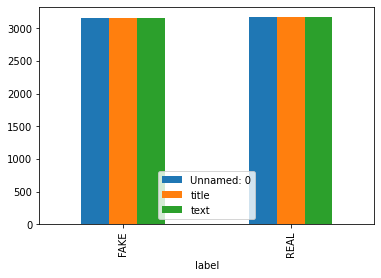

In [ ]:
import matplotlib.pyplot as plt
print(df.groupby(['label']).count())
df.groupby(['label']).count().plot(kind='bar')
plt.show()

       Unnamed: 0  title  text
label                         
FAKE         3164   3164  3164
REAL         3171   3171  3171


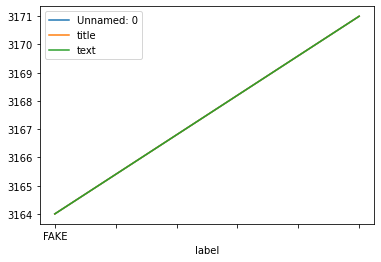

In [ ]:
import matplotlib.pyplot as plt
print(df.groupby(['label']).count())
df.groupby(['label']).count().plot(kind='line')
plt.show()